In [17]:
# 必要なライブラリのインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [18]:
# データセットを読み込み
from sklearn.datasets import load_boston # bostonデータを格納したクラス
boston = load_boston()                   # インスタンスを生成

In [19]:
# DataFrameを生成
df_data = pd.DataFrame(boston.data, columns=boston.feature_names)
df_target = pd.DataFrame(boston.target, columns=['MEDV'])
df = pd.concat([df_data, df_target], axis=1)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [20]:
# 特徴量を抽出
lstat = df.loc[:, ['LSTAT']].values
rm = df.loc[:, ['RM']].values
y = df.loc[:, ['MEDV']].values


In [21]:
# ホールド・アウト法によるデータの分割
# random_stateを0に固定してあるので､毎回同じサンプルに分割
from sklearn.model_selection import train_test_split
lstat_train, lstat_test, y_train, y_test = train_test_split(lstat, y, test_size = 0.3, random_state = 0)

In [22]:
# 線形回帰のモデルを学習させる
from sklearn.linear_model import LinearRegression
model_lin = LinearRegression()
model_lin.fit(lstat_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

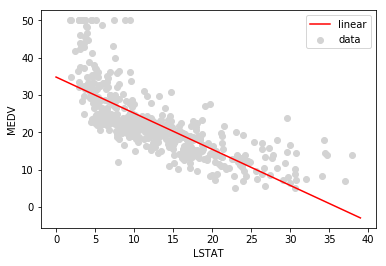

In [23]:
# 散布図に近似直線を重ねてみる
plt.scatter(lstat, y, color='lightgray', label='data')         # 散布図を表示
x = np.arange(0, 40, 1)[:, np.newaxis]                         # プロットのためのxを用意
plt.plot(x, model_lin.predict(x), color='red', label='linear') # 回帰直線を表示
plt.xlabel('LSTAT')                                            # x軸のラベルを表示
plt.ylabel('MEDV')                                             # y軸のラベルを表示
plt.legend(loc = 'upper right')                                # 凡例を表示
plt.show()                                                     # 上記の内容でグラフを表示

In [24]:
# 2次関数の変数変換
from sklearn.preprocessing import PolynomialFeatures
quad = PolynomialFeatures(degree=2)    # 2次の多項式規定を生成
lstat_quad = quad.fit_transform(lstat) # 生成した基底関数で変数変換を実行
lstat_quad

array([[  1.    ,   4.98  ,  24.8004],
       [  1.    ,   9.14  ,  83.5396],
       [  1.    ,   4.03  ,  16.2409],
       ..., 
       [  1.    ,   5.64  ,  31.8096],
       [  1.    ,   6.48  ,  41.9904],
       [  1.    ,   7.88  ,  62.0944]])

In [25]:
# ホールド・アウト法によるデータの分割
# random_stateを0に固定してあるので､毎回同じサンプルに分割
lstat_quad_train, lstat_quad_test, _, _ = train_test_split(lstat_quad, y, test_size = 0.3, random_state = 0)

In [26]:
# 線形回帰のインスタンスを生成
model_quad = LinearRegression()

# 変換後の変数を利用して実行
model_quad.fit(lstat_quad_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

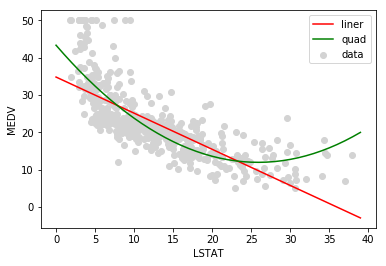

In [31]:
# 散布図に近似直線､近似曲線を重ねてみる
plt.scatter(lstat, y, color='lightgray', label='data')               # 散布図を表示
plt.plot(x, model_lin.predict(x), color='red', label='liner')       # 回帰直線を表示
x_quad = quad.fit_transform(x)                                       # プロットのためのxも2変数変換する
plt.plot(x, model_quad.predict(x_quad), color='green', label='quad') # 回帰曲線を表示（2次関数）
plt.xlabel('LSTAT')                                                  # x軸のラベルを表示
plt.ylabel('MEDV')                                                   # y軸のラベルを表示
plt.legend(loc = 'upper right')                                      # 凡例を表示
plt.show()                                                           # 上記の内容でグラフを表示

In [32]:
# 3次関数の変数変換
cubic = PolynomialFeatures(degree=3)     # 3次の多項式規定を生成
lstat_cubic = cubic.fit_transform(lstat) # 生成した基底関数で変数変換を実行
lstat_cubic

array([[   1.      ,    4.98    ,   24.8004  ,  123.505992],
       [   1.      ,    9.14    ,   83.5396  ,  763.551944],
       [   1.      ,    4.03    ,   16.2409  ,   65.450827],
       ..., 
       [   1.      ,    5.64    ,   31.8096  ,  179.406144],
       [   1.      ,    6.48    ,   41.9904  ,  272.097792],
       [   1.      ,    7.88    ,   62.0944  ,  489.303872]])

In [33]:
# ホールド・アウト法による分割
lstat_cubic_train, lstat_cubic_test, _, _ = train_test_split(lstat_cubic, y, test_size = 0.3, random_state = 0)

In [34]:
# 線形回帰のインスタンスを生成
model_cubic = LinearRegression()

# 変換後の変数を利用して実行
model_cubic.fit(lstat_cubic_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

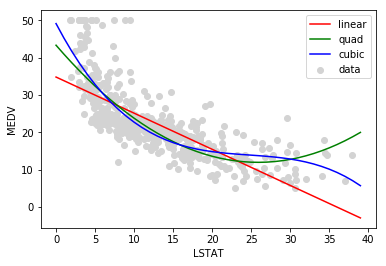

In [35]:
# 散布図に近似直線､近似曲線を重ねてみる
plt.scatter(lstat, y, color='lightgray', label='data')                 # 散布図を表示
plt.plot(x, model_lin.predict(x), color='red', label='linear')         # 回帰直線を表示
plt.plot(x, model_quad.predict(x_quad), color='green', label='quad')   # 回帰曲線を表示（2次関数）
x_cubic = cubic.fit_transform(x)                                       # プロットのためのxも2変数変換する
plt.plot(x, model_cubic.predict(x_cubic), color='blue', label='cubic') # 回帰曲線を表示（2次関数）
plt.xlabel('LSTAT')                                                    # x軸のラベルを表示
plt.ylabel('MEDV')                                                     # y軸のラベルを表示
plt.legend(loc = 'upper right')                                        # 凡例を表示
plt.show()                                                             # 上記の内容でグラフを表示

In [36]:
# 自由度調整済み決定係数
# (決定係数, trainまたはtestのサンプル数, 利用した特徴量の数)
def adjusted(score, n_sample, n_features):
    adjusted_score = 1 - (1 - score) * ((n_sample - 1) / (n_sample - n_features - 1))
    return adjusted_score

In [44]:
# 自由度調整済み決定係数をtrainとtestに分けて出力
print('adjusted R^2')
print('')

# 線形回帰
print('model_linear')
print('train: %.3f' % adjusted(model_lin.score(lstat_train, y_train), len(y_train), 1))
print('test : %.3f' % adjusted(model_lin.score(lstat_test, y_test), len(y_test), 1))
print('')

# 2次関数
print('model_quad')
print('train: %.3f' % adjusted(model_quad.score(lstat_quad_train, y_train), len(y_train), 2))
print('test : %.3f' % adjusted(model_quad.score(lstat_quad_test, y_test), len(y_test), 2))
print('')

# 3次関数
print('model_cubic')
print('train: %.3f' % adjusted(model_cubic.score(lstat_cubic_train, y_train), len(y_train), 3))
print('test : %.3f' % adjusted(model_cubic.score(lstat_cubic_test, y_test), len(y_test), 3))

adjusted R^2

model_linear
train: 0.551
test : 0.519

model_quad
train: 0.656
test : 0.591

model_cubic
train: 0.672
test : 0.607


In [45]:
# LSTAT（1次）にRMを加える
X_lin = np.hstack((lstat, rm))

In [46]:
# ホールド・アウト法によるデータの分割
X_lin_train, X_lin_test, _, _ = train_test_split(X_lin, y, test_size = 0.3, random_state = 0)
# 線形回帰による学習
model_lin_2 = LinearRegression()
model_lin_2.fit(X_lin_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
# LSTAT（2次）にRMを加える
X_quad = np.hstack((lstat_quad, rm))

In [48]:
# ホールド・アウト法によるデータの分割
X_quad_train, X_quad_test, _, _ = train_test_split(X_quad, y, test_size = 0.3, random_state = 0)
# 線形回帰による学習
model_quad_2 = LinearRegression()
model_quad_2.fit(X_quad_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
# LSTAT（3次）にRMを加える
X_cubic = np.hstack((lstat_cubic, rm))

In [51]:
# ホールド・アウト法によるデータの分割
X_cubic_train, X_cubic_test, _, _ = train_test_split(X_cubic, y, test_size = 0.3, random_state = 0)
# 線形回帰による学習
model_cubic_2 = LinearRegression()
model_cubic_2.fit(X_cubic_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [52]:
# 自由度調整済み決定係数をtrainとtestに分けて出力
print('adjusted R^2')
print('')

# 線形回帰
print('model_linear_2')
print('train: %.3f' % adjusted(model_lin_2.score(X_lin_train, y_train), len(y_train), 2))
print('test : %.3f' % adjusted(model_lin_2.score(X_lin_test, y_test), len(y_test), 2))
print('')

# 2次関数
print('model_quad_2')
print('train: %.3f' % adjusted(model_quad_2.score(X_quad_train, y_train), len(y_train), 3))
print('test : %.3f' % adjusted(model_quad_2.score(X_quad_test, y_test), len(y_test), 3))
print('')

# 3次関数
print('model_cubic_2')
print('train: %.3f' % adjusted(model_cubic_2.score(X_cubic_train, y_train), len(y_train), 4))
print('test : %.3f' % adjusted(model_cubic_2.score(X_cubic_test, y_test), len(y_test), 4))

adjusted R^2

model_linear_2
train: 0.649
test : 0.602

model_quad_2
train: 0.726
test : 0.630

model_cubic_2
train: 0.728
test : 0.628


In [53]:
# 残差プロットを行う関数を定義
def res_plot(y_train, y_train_pred, y_test, y_test_pred):
    # train, testごとに残差を算出
    res_train = y_train_pred - y_train
    res_test  = y_test_pred - y_test
    
    # train, testごとに(予測値, 残差)をプロット
    plt.figure(figsize=(8, 8))
    plt.scatter(y_train_pred, res_train, color='blue', marker='o', label='train', alpha=0.5)
    plt.scatter(y_test_pred, res_test, color='green', marker='s', label='test', alpha=0.5)
    
    plt.xlabel('Predicted Values')                  # x軸のラベルを表示
    plt.ylabel('Residuals')                         # y軸のラベルを表示
    plt.legend(loc='upper left')                    # 凡例を左上に表示
    plt.hlines(y=0, xmin=-10, xmax=50, color='red') # 残差0の線を表示
    plt.xlim([-10, 50])                             # 表示する横軸の範囲を指定
    plt.show()

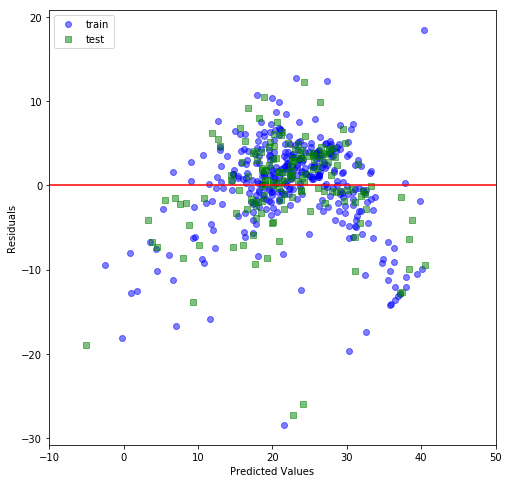

In [54]:
# 残差プロットを出力
# 線形回帰の場合
res_plot(y_train, model_lin_2.predict(X_lin_train), y_test, model_lin_2.predict(X_lin_test))

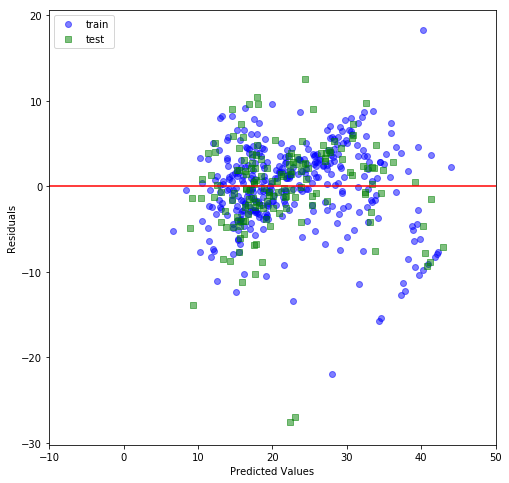

In [55]:
# 残差プロットを出力
# 多項式回帰（3次関数の場合）
res_plot(y_train, model_cubic_2.predict(X_cubic_train), y_test, model_cubic_2.predict(X_cubic_test))